# Week 3: What Factors Drive CostPro Customer Purchasing Behaviors?

🚨 **First things first! Make a copy of this notebook. Your changes will not save unless you create your own copy!**

💡 Build Intuition

As a data scientist at CostPro, your goal is to collect and analyze data on various factors influencing the likelihood of a purchase, such as a customer's past purchasing history, online behavior, and demographic information.

You'll formulate hypotheses about which factors are related to customer purchasing behavior, test them, and report your confidence in your results.

## 🚀 Project Jumpstart

### Dependencies

In [ ]:
!pip install numpy pandas seaborn matplotlib gdown scipy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, ttest_ind, f_oneway, bernoulli, anderson_ksamp, bartlett, levene
import gdown
from typing import Optional

In [ ]:
# set the random seed
random_seed = 42

### 💾  Data

**💡** Build Intuition: Be sure to check out the [data dictionary!](https://docs.google.com/spreadsheets/d/12whrxX0nIGQRoXzztBjfQ06ocBU97v90w5bf3Mbj4wA/edit?usp=sharing) It will help you build intuition about what data is available to you and how you might want to use it!

#### Download the Data

In [ ]:
# Download the file from co:rise google drive
file_name = "lead_scoring.csv"
unique_id = "12aneagHSDvOsqAIsvW6aSmuOPuS7qihm"
gdown.download(id=unique_id, output=file_name)

In [ ]:
# import data and show first 5 rows
data = pd.read_csv(file_name)
data.head()

#### Data Exploration

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
# check the number of missing values in each column
data.isnull().sum(axis=0)

### Does Offering a Client a Freebie Impact Purchasing Behavior? (Binary Variable)

One common strategy in retail is to provide a customer with a free gift in the hope of increasing the likelihood they will purchase. In this case, CostPro gave away a free book.

In [ ]:
data["Free book"].value_counts()

#### ⚙️ Develop a Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

Now that we understand a little bit about our data, we know we're getting a binary or "yes" / "no" answer when it comes to conversion.

Let's set up our null and alternative hypotheses about the impact of giveaways on CostPro Customer Conversion.

##### Null Hypothesis ($H_0$)

Offering clients a freebie does not impact purchasing behavior



##### Alternative Hypothesis ($H_1$)

Offering clients a freebie does impact purchasing behavior



#### ⚙️ Select a Metric: Conversion

💡 Build Intuition: [Review the relevant course material on selecting tests and metrics](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/selecting-tests-njq6i)

To start, let's select a simple binary metric, "Converted", that describes whether or the client made a purchase.

In [ ]:
data["Converted"].value_counts()

#### ⚙️ Test a Hypothesis

Let's test our hypothesis. In order to understand if there is a relationship between giveaways, we will go through the following steps:

1) Create random samples of a variety of sizes based on whether the customer did or did not receive a free book

2) Use a t-test to determine whether or not there is a relationship between customers who received a free book and conversion rate.

3) Review sample sizes and p-value associated with each t-test to understand the importance of sample size in being able to detect results.

##### Play with Sample Sizes to Understand Why They Matter

💡 Build Intuition: [Review the relevant course content on power calculation to understand more about why sample sizes matter.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/power-calculation-0o8tl)

⚠️ Caution: Do NOT do loop through sample sizes at work. This is purely an exercise for your learning and to show you why sample size matters. In practice (on the job and in research settings) picking your sample size based on statistical significance is called "p-hacking."

In [ ]:
# Write a function to return two samples of the same size
def get_samples(
    data: pd.DataFrame, sample_size: int, treatment_column: str, outcome_column: str
) -> tuple:
    """
    Returns two samples of the same size from the data.
    data (pd.DataFrame): the data to be used
    sample_size (int): the size of the sample to be returned
    treatment_column (str): the name of the column to be used for the treatment
    outcome_column (str): the name of the column to be used for the outcome

    Returns:
    list: two samples of the same size
    """

    treatment_sample = data[data[treatment_column] == "Yes"].sample(
        n=sample_size, random_state=random_seed
    )[outcome_column]
    no_treatment_sample = data[data[treatment_column] == "No"].sample(
        n=sample_size, random_state=random_seed
    )[outcome_column]
    return [no_treatment_sample, treatment_sample]

In [ ]:
sample_sizes = [100, 200, 500, 1000, 2000, 2500]

# Write a function that loops through the sample sizes and returns the p-value for each sample size
def get_p_values(
    data: pd.DataFrame, sample_sizes: list, treatment_column: str, outcome_column: str
) -> list:
    """
    Returns the p-values for each sample size.
    data (pd.DataFrame): the data to be used
    sample_sizes (list): the list of sample sizes to be used
    treatment_column (str): the name of the column to be used for the treatment
    outcome_column (str): the name of the column to be used for the outcome

    Returns:
    list: the p-values for each sample size
    """

    sample_sizes_with_p_values = []
    for sample_size in sample_sizes:
        samples = get_samples(
            data, sample_size, treatment_column, outcome_column
        )
        p_value = ttest_ind(samples[0], samples[1], equal_var=False)[1]
        sample_sizes_with_p_values.append((sample_size, p_value))
    return sample_sizes_with_p_values

In [ ]:
# Return the p-values for each sample size
p_values = get_p_values(
    data, sample_sizes, "Free book", "Converted"
)
p_values

See how much the p-value changes as the sample size increases!

At a sample size of 100, we have a p-value of .36 which means that we reject the alternative hypothesis. However, at a sample size of 2500, we have a p-value of 0.002 which means we reject the null hypothesis and have reason to believe there is a relationship between giving potential customers a free book and them converting into CostPro customers.

##### Perform a Power Calcuation

The recommended way to determine sample size!

Minimum sample size: 25.52457250047935


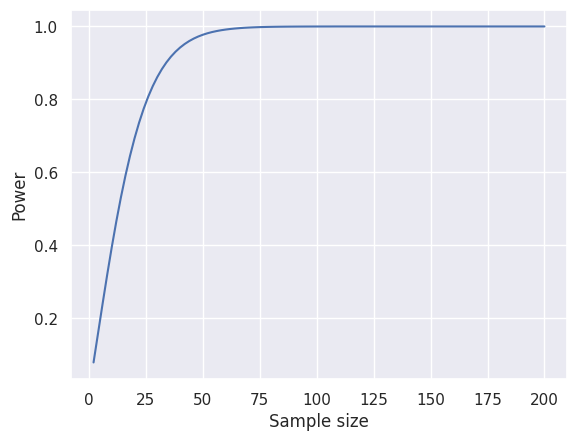

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Specify the parameters of the t-test
effect_size = 0.8
alpha = 0.05
power = 0.8

# Initialize the power calculator
power_calculator = TTestIndPower()

# Calculate the minimum sample size required to achieve the desired power
sample_size = power_calculator.solve_power(effect_size=effect_size,
                                           power=power,
                                           alpha=alpha)
print("Minimum sample size:", sample_size)

# Create an array of sample sizes to plot
sample_sizes = np.linspace(start=2, stop=200, num=100)

# Calculate the power of the t-test for each sample size
powers = power_calculator.power(effect_size=effect_size,
                                nobs1=sample_sizes,
                                alpha=alpha)

# Plot the power as a function of sample size
plt.plot(sample_sizes, powers)
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.show()

#### 📈 Visualize the Results

Now that we have our results, let's visualize them!

In [ ]:
# Write a function that plots the p-values for each sample size
def plot_p_values(sample_sizes_with_p_values: list) -> None:
    """
    Plots the p-values for each sample size.
    sample_sizes_with_p_values (list): the list of sample sizes and p-values to be used

    Returns:
    None
    """

    sample_sizes = [
        sample_size_with_p_value[0]
        for sample_size_with_p_value in sample_sizes_with_p_values
    ]
    p_values = [
        sample_size_with_p_value[1]
        for sample_size_with_p_value in sample_sizes_with_p_values
    ]
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, p_values)
    plt.xlabel("Sample Size")
    plt.ylabel("P-value")
    plt.show()

❓ At what sample size do results become significant (p-value < 0.05)?

In [ ]:
# Plot the p-values for each sample size
plot_p_values(
    get_p_values(
        data, sample_sizes, "Free book", "Converted"
    )
)

### Does Lead Source Increase Time Spent on CostPro's Website?

CostPro also wants to explore whether or not some leads are higher quality than others. Time spent on site is a metric for which CostPro is optimizing.

In order to understand whether or not there is a relationship between lead source and time spent on site, we will analyze using a one-way ANOVA.

#### ⚙️ Develop a Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

First, let's set up our hypotheses! The null hypothesis is that there is not a relationship between lead source and time spent on the website, while the alternative hypothesis is that lead source does have a relationship with time spent on the website.

##### Null Hypothesis ($H_0$)

Lead source does not impact time spent on the website



##### Alternative Hypothesis ($H_1$)

Lead source does impact time spent on the website




#### ⚙️ Test a Hypothesis

ANOVA is capable of handling more than two samples, so we've adjusted our sampling function below to allow for that. In this case, we'll still keep our number of samples to 3.

💡 Build Intuition: [Review the relevant course material on ANOVA.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/parametric-tests-qvtoc#corise_clcz6mj8m000s3b6ri8yciryy)

In [ ]:
# Write a function to get n samples of the same size from the data
def get_n_samples(
    data: pd.DataFrame,
    sample_size: int,
    treatment_column: str,
    outcome_column: str,
    categories: Optional[list] = None,
) -> list:
    """
    Returns n samples of the same size from the data.
    data (pd.DataFrame): the data to be used
    sample_size (int): the size of the sample to be returned
    treatment_column (str): the name of the column to be used
    outcome_column (str): the name of the column to be used
    categories (list): list of categories to be used

    Returns:
    list: n samples of the same size
    """

    samples = []
    if categories is None:
        categories = data[treatment_column].unique()

    for category in categories:
        sample = data[data[treatment_column] == category].sample(
            n=sample_size, random_state=random_seed
        )[outcome_column]
        samples.append(sample)
    return samples

Next, we'll follow a similar pattern to the t-test in that we want to explore the results of the ANOVA at a variety of sample sizes.

In this function below, we loop through samples of various sizes and run a one-way ANOVA on each of them. The function returns a tuple with three values: the sample size, the f-statistic, and the p-value.

⚠️ Caution: Do NOT do loop through sample sizes at work. This is purely an exercise for your learning and to show you why sample size matters. In practice (on the job and in research settings) picking your sample size based on statistical significance is called "p-hacking."

In [ ]:
# Write a function that returns f statistics and p values for each sample size
def get_f_statistic_scores(
    data: pd.DataFrame,
    sample_sizes: list,
    treatment_column: str,
    outcome_column: str,
    categories: Optional[list] = None,
) -> list:
    """
    Returns the f statistic scores for each sample size.
    data (pd.DataFrame): the data to be used
    sample_sizes (list): the list of sample sizes to be used
    treatment_column (str): the name of the column to be used for the treatment
    outcome_column (str): the name of the column to be used for the outcome
    categories (Optional[list]): list of categories to be used

    Returns:
    list: tuples of sample size, f-statistic, and p-value
    """

    sample_sizes_with_f_statistic_scores = []
    for sample_size in sample_sizes:
        samples = get_n_samples(
            data, sample_size, treatment_column, outcome_column, categories
        )
        f_statistic_score, p_value = f_oneway(*samples)
        sample_sizes_with_f_statistic_scores.append((sample_size, f_statistic_score, p_value))
    return sample_sizes_with_f_statistic_scores

In [ ]:
# Get the f1 scores for each sample size
f_statistic_scores = get_f_statistic_scores(
    data,
    [100, 250, 500, 1000, 1500],
    "Lead Source",
    "Total Time Spent on Website",
    categories=["Chat","Google", "Direct Traffic"],
)
f_statistic_scores


## Your Turn

Develop two sets of hypotheses and test them. For your first hypothesis, run a t-test on a continuous variable. For your second test, try implementing an ANOVA.

### T-test

#### ⚙️ Develop Your Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

##### Null Hypothesis

Write your null hypothesis here.

$H_0$:

##### Alternative Hypothesis

Write your alternative hypothesis here.

$H_1$:

#### Check In!

If you want to check in before you proceed - drop your hypotheses in slack and we will give you feedback!!!

#### ⚙️ Test Your Hypothesis

💡 Build Intuition: [Review the relevant course material on T-tests.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/parametric-tests-qvtoc#corise_clcz6lwns000q3b6r107rxx04)

Write a function to output the results for a T-test on a continuous variable.

In [ ]:
# uncomment the function below and add your sample size, treatment column name and outcome column name to get samples
# samples = get_n_samples(
#     data, <YOUR_SAMPLE_SIZE_HERE>, "<TREATMENT_COLUMN_NAME_HERE>", "<OUTCOME_COLUMN_NAME_HERE>"
# )

In [ ]:
# write a function
def your_t_test_function():
    pass

#### 📈 Visualize the Results

Graph the results of the T-test

In [ ]:
# write a function to visualize your results

def visualize_t_test_results():
    pass

### ANOVA

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

#### ⚙️ Develop Your Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

##### Null Hypothesis

Write your null hypothesis here.

$H_0$:

##### Alternative Hypothesis

Write your alternative hypothesis here.

$H_1$: <WRITE YOUR HYPOTHESIS HERE>

#### Check In!

If you want to check in before you proceed - drop your hypotheses in slack and we will give you feedback!!!

#### ⚙️ Test Your Hypothesis

💡 Build Intuition: [Review the relevant course material on ANOVA.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/parametric-tests-qvtoc#corise_clcz6mj8m000s3b6ri8yciryy)

Write a function to implement a one-way ANOVA.

In [ ]:
# uncomment the function below and add your sample size, treatment column name and outcome column name to get samples
# samples = get_n_samples(
#     data, <YOUR_SAMPLE_SIZE_HERE>, "<TREATMENT_COLUMN_NAME_HERE>", "<OUTCOME_COLUMN_NAME_HERE>"
# )

In [ ]:
# write a function to implement a one-way ANOVA
def test_one_way_anova():
    pass

#### 📈 Visualize the Results

In [ ]:
# write a function to visualize your results
def visualize_one_way_anova():
    pass

## 🔎 Can We Trust These Results?

### ⚙️ Calculate a Confidence Interval

💡 Build Intuition about confidence intervals by [reviewing relevant course content.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/confidence-intervals-duhm9j#corise_clcowktej001s3b6tfcpdpn0f)

Practice calculating a confidence interval or use a library function from a python library to calculate it for you.

In [ ]:
samples = get_n_samples(
    data, 1000, "Lead Source", "Total Time Spent on Website" , ["Chat", "Organic Search", "Direct Traffic"]
)

In [ ]:
# write your function here
def calculate_confidence_interval():
    pass

In [ ]:
calculate_confidence_interval()

### ⚙️ Test the Assumptions of Parametric Tests
💡 Build Intuition: [Review the relevant course material on assumptions behind parametric tests](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/selecting-tests-njq6i#corise_clcq9bgkq00303b6w450qn8fe)

##### Normality

One of the assumptions underlying parametric tests is that the population is distributed normally. We can test for normality using several tests, including the Shapiro-Wilk test or the Anderson-Darling test.

$H_0$: The sample comes from a normally distributed population.

$H_1$: The sample does not come from a normally distributed population.

How to interpret this test:

If the p-value is less than 0.05, we reject the null hypothesis, suggesting that the sample is unlikely to have come from a normally distributed population.

In [ ]:
# Write a function to test the assumption of normality
def test_normality(samples: list) -> str:
    """
    Tests the assumption of normality.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """
    result = []

    for i, sample in enumerate(samples):
        if len(sample) > 2:
            stat, p = shapiro(sample)
            result.append((i, stat, p))
            print("Shapiro test statistic:", stat)
            print("Shapiro p-value:", p)
            if p > 0.05:
                return "The samples are normally distributed."
            else:
                return "The samples are not normally distributed."
        else:
            stat, critical_value, p = anderson_ksamp([sample, bernoulli.rvs(p=sample.mean(), size=sample.shape[0])])
            result.append((i, stat, critical_value, p))
            print('Anderson-Darling statistic:', stat)
            print('Anderson-Darling p-value:', p)
            if p > 0.05:
                return "The samples are normally distributed."
            else:
                return "The samples are not normally distributed."

In [ ]:
samples = get_samples(data, 2500, "Free book", "Converted")
len(samples[0])

In [ ]:
# Test the assumption of normality
test_normality(samples)

#### 📈 Visualize the Results

In [ ]:
# Write a function to visualize normality
def visualize_normality(samples: list) -> None:
    """
    Visualizes the assumption of normality.
    samples (list): the list of samples to be used

    Returns:
    None
    """
    # Visualize the data to check for normality
    sns.set(style="darkgrid")
    for i, sample in enumerate(samples):
        sns.histplot(sample, kde=True, label=f"Group {i+1}", color=f"C{i}", legend=True)

    plt.legend()
    return

In [ ]:
visualize_normality(samples)

#### Independence

One of the assumptions underlying parametric tests is that the samples being compared are independent. We can test for independence using a test called the Chi squared contingency test.

$H_0$: The samples are independent

$H_1$: The samples are not independent

How to interpret this test:

If the p-value is less that 0.05, we reject null hypothesis and say that the differences are unlikely to have come from truly independent samples.

In [ ]:
# Write a function to test the assumption of independence
from scipy.stats import chi2_contingency

def test_independence(samples: list) -> str:
    """
    Tests the assumption of independence.
    samples (list): the samples to be used

    Returns:
    any: the p-value
    """

    stat, p, _, _ = chi2_contingency(*samples)

    if p > 0.05:
        return(f'The samples are independent with a chi2 contingency statistic of {stat} and a p-value of {p}')
    else:
        return(f'The samples are not independent with a chi2 contingency statistic of {stat} and a p-value of {p}')

In [ ]:
# Test the assumption of independence
test_independence(get_samples(
            data, 2500, "Free book", "Converted"
        ))

#### Equal Variances

One of the other assumptions underlying parametric tests is that the groups being compared have equal variances. This is called homoscedasticity. We can test for equal variances using either Barlett's test or Levene's test.

The Levene test is less sensitive than the Bartlett test to data being normally distributed. If your data *is* normally distributed then Bartlett's test has better performance.

In both cases the hypothesis are the same:

$H_0$: The samples have equal variances

$H_1$: The samples do not have equal variances

How to interpret this test:

If the p-value is less that 0.05, we reject the null hypothesis and say that the differences in sample variances are unlikely to have come from random sampling a population with equal variances.


In [ ]:
def test_homoscedasticity_bartlett(samples: list) -> str:
    """
    Tests that both groups have equal variances using Bartlett's test.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """

    stat, p = bartlett(*samples)
    print("Bartlett test statistic:", stat)
    print("Bartlett p-value:", p)
    if p > 0.05:
        return f"The samples have equal variances with a Bartlett statistic of {stat} and a p-value of {p}"
    else:
        return f"The samples do not have equal variances with a Bartlett statistic of {stat} and a p-value of {p}"


def test_homoscedasticity_levene(samples: list) -> str:
    """
    Tests that both groups have equal variances using Levene's test.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """

    stat, p = levene(*samples)
    print("Levene test statistic:", stat)
    print("Levene p-value:", p)
    if p > 0.05:
        return f"The samples have equal variances with a Levene statistic of {stat} and a p-value of {p}"
    else:
        return f"The samples do not have equal variances with a Levene statistic of {stat} and a p-value of {p}"


In [ ]:
# Test the assumption of homoscedasticity
samples = get_samples(data, 2500, "Free book", "Converted")

print(test_homoscedasticity_bartlett(samples))
print(test_homoscedasticity_levene(samples))

## 🤯 Expand Your Learning

Two Options:

1) Try Bootstrapping to See If It Helps with Meeting Assumptions of Parametric Tests

2) Get a Head Start on Next Week!

### Bootstrapping

Bootstrapping is re-sampling method that uses random sampling with replacement.

You could try bootstrapping to see if it improves your outcomes for parametric testing.

In [ ]:
# write a function to implement bootstrapping
def bootstrapping():
    pass

In [ ]:
# test bootstrapping function
assert True

Now that you've got your bootstrapped samples, try running either a t-test or an ANOVA again.

In [ ]:
# re-run one of the test functions

### [Optional] Get a Head Start on Next Week

Technically, our data didn't meet all of the core assumptions for either t-test or ANOVA. This is a common problem you might run into on the job. Look up what to do in cases like this and implement a solution. Bonus points if you write the functions to prove your proposed solution meets the core assumptions of the test you use.


In [ ]:
# uncomment the function below and add your sample size, treatment column name and outcome column name to get samples
# samples = get_n_samples(
#     data, <YOUR_SAMPLE_SIZE_HERE>, "<TREATMENT_COLUMN_NAME_HERE>", "<OUTCOME_COLUMN_NAME_HERE>"
# )

🔎 Examine Assumptions

In [ ]:
# write function(s) to test the assumptions of your non-parametric test
def your_non_parametric_test_assumptions_function():
    pass

In [ ]:
your_non_parametric_test_assumptions_function()

⚙️ Implement the Method

In [ ]:
# write a non-parametric test function here
def your_non_parametric_test_function():
    pass

In [ ]:
your_non_parametric_test_function()

📈 Visualize the Results

In [ ]:
# write a non-parametric test visualization here
def your_non_parametric_visualization_function():
    pass

In [ ]:
your_non_parametric_visualization_function()